In [2]:
import numpy as np #
import pandas as pd #file handeling
import seaborn as sns # adv visualization
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score

In [5]:
df=pd.read_csv('/Volumes/Utility/All About data science/Python/Data_Science/Machine_Learning/housing_price_predicition/Data_set/Housing.csv')

In [6]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [9]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [10]:
df.shape

(545, 13)

In [11]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [12]:
df['area']=df['area'].astype(float)
df['price']=df['price'].astype(float)

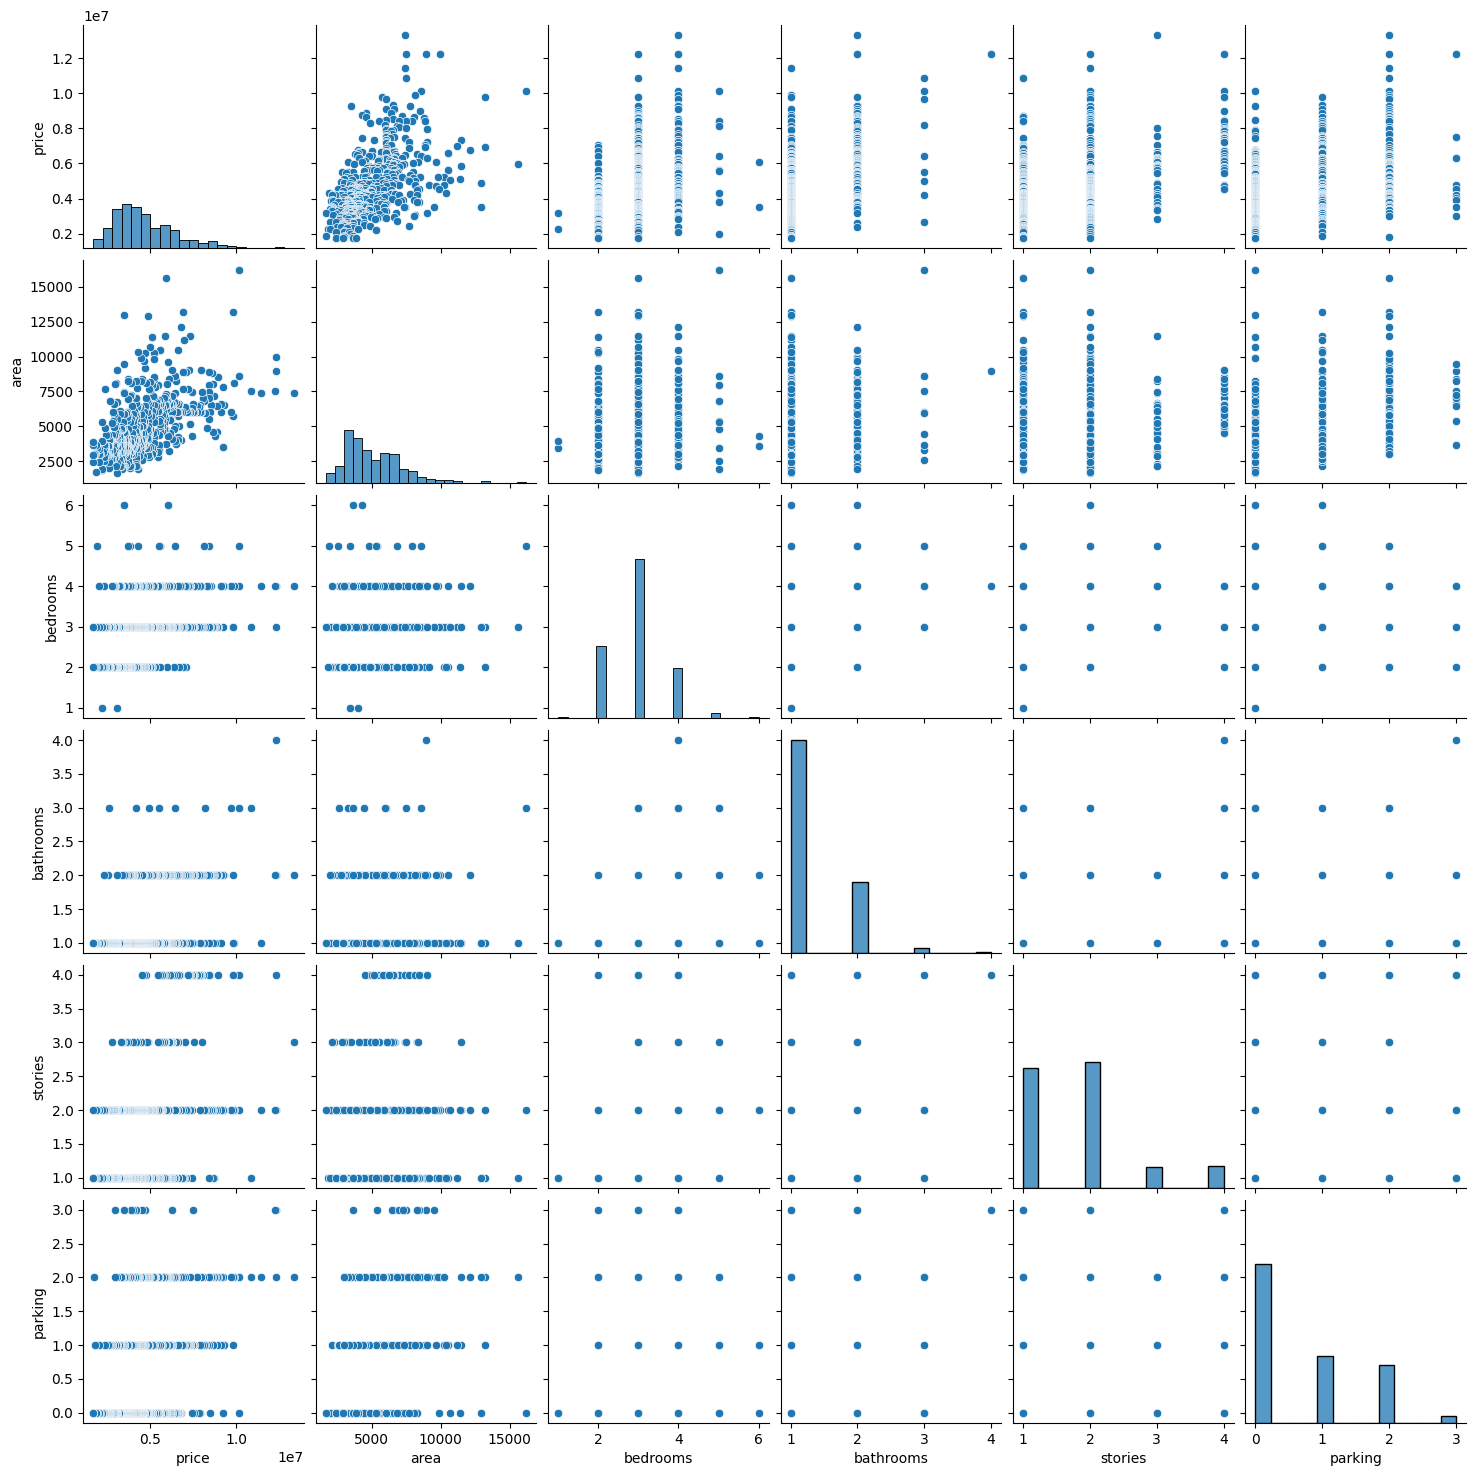

In [13]:
sns.pairplot(df)

In [15]:
df.dtypes

price               float64
area                float64
bedrooms              int64
bathrooms             int64
stories               int64
mainroad             object
guestroom            object
basement             object
hotwaterheating      object
airconditioning      object
parking               int64
prefarea             object
furnishingstatus     object
dtype: object

In [16]:
df.duplicated().sum()

np.int64(0)

In [25]:
categorical_col=df.select_dtypes(include=['object','category']).columns

In [26]:
df_encode=pd.get_dummies(df, columns=categorical_col, drop_first=True)

In [29]:
df_encode.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000.0,7420.0,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000.0,8960.0,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000.0,9960.0,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000.0,7500.0,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000.0,7420.0,4,1,2,2,True,True,True,False,True,False,False,False


               price          area    bedrooms   bathrooms     stories  \
count   5.450000e+02    545.000000  545.000000  545.000000  545.000000   
unique           NaN           NaN         NaN         NaN         NaN   
top              NaN           NaN         NaN         NaN         NaN   
freq             NaN           NaN         NaN         NaN         NaN   
mean    4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std     1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min     1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%     3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%     4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%     5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max     1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

       mainroad guestroom basement hotwaterheating airconditioning  \
count       545       545      545       

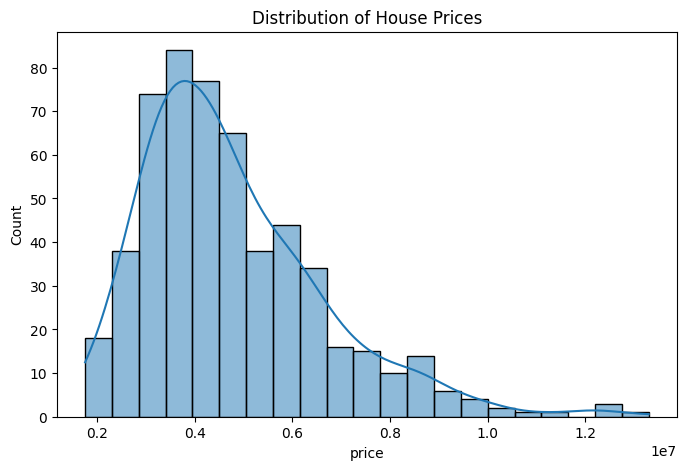

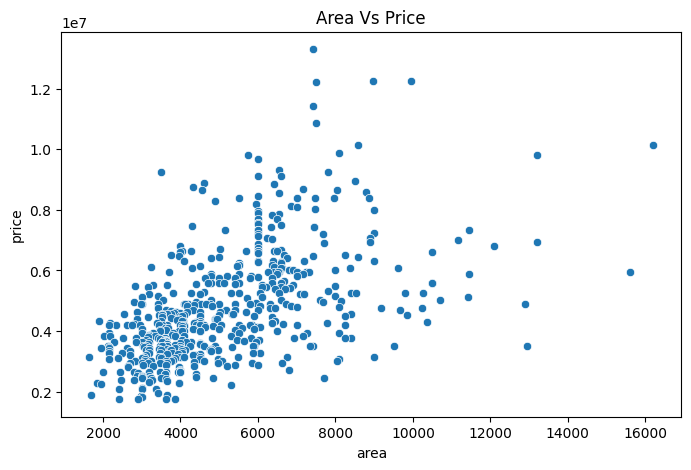

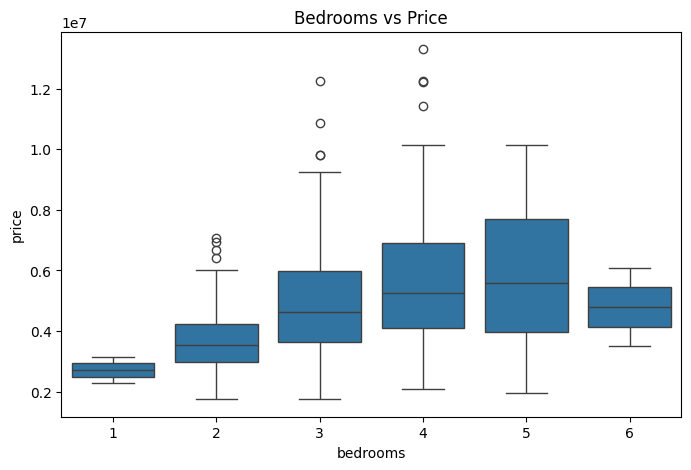

In [30]:
#summary statistics
print(df.describe(include='all'))

#price distribution
plt.figure(figsize=(8,5))
sns.histplot(df['price'],kde=True)
plt.title('Distribution of House Prices')
plt.show()

#Area vs Price
plt.figure(figsize=(8,5))
sns.scatterplot(x='area',y='price',data=df)
plt.title('Area Vs Price')
plt.show()

#Bedrooms vs Price
plt.figure(figsize=(8,5))
sns.boxplot(x='bedrooms',y='price',data=df)
plt.title('Bedrooms vs Price')
plt.show()

In [35]:
numerical_col=df.select_dtypes(include=['number']).columns

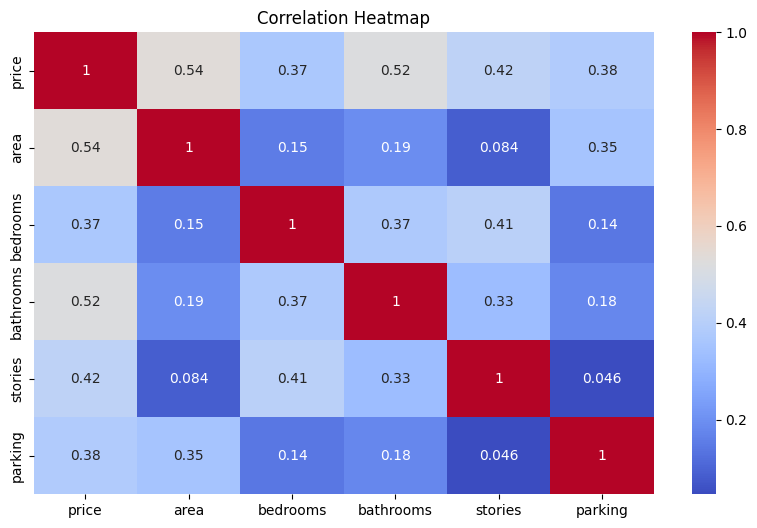

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numerical_col].corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

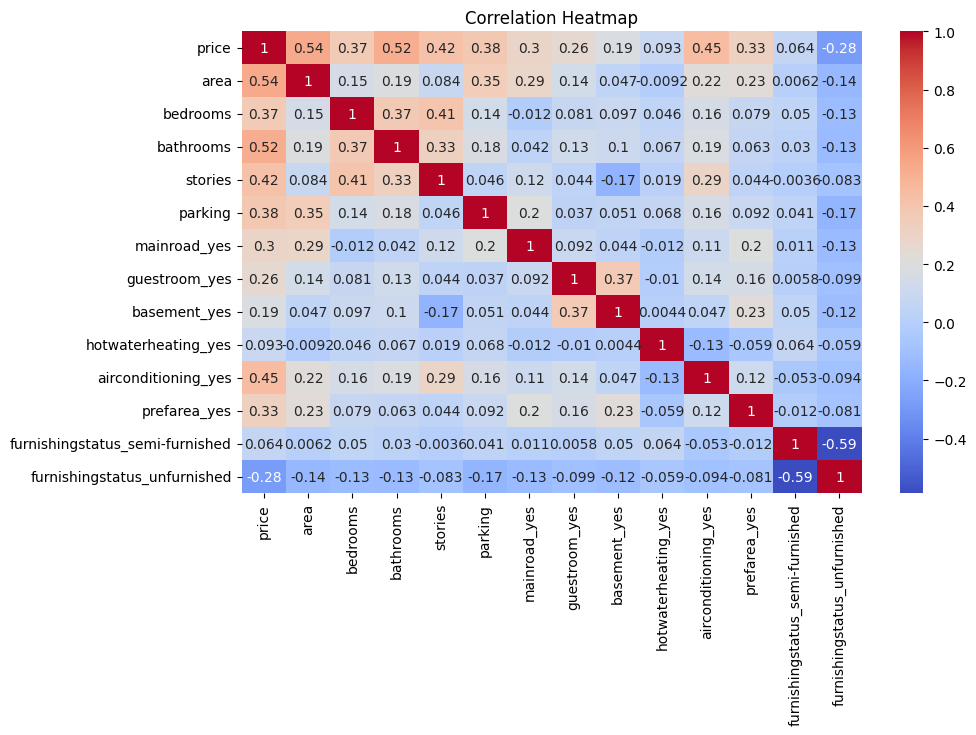

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(df_encode.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

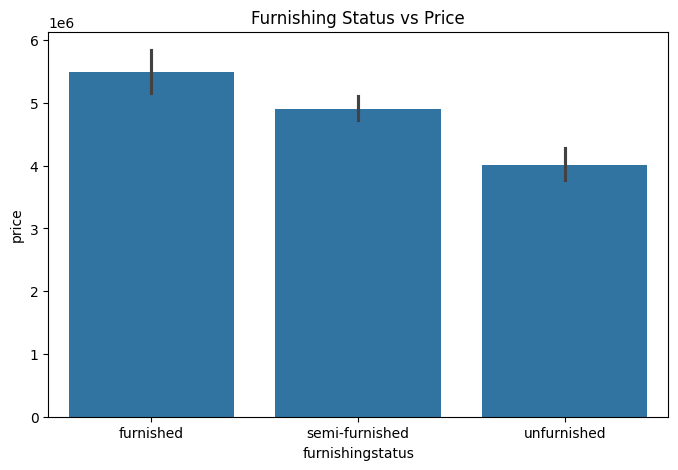

In [38]:
plt.figure(figsize=(8,5))
sns.barplot(x='furnishingstatus',y='price',data=df)
plt.title('Furnishing Status vs Price')
plt.show()

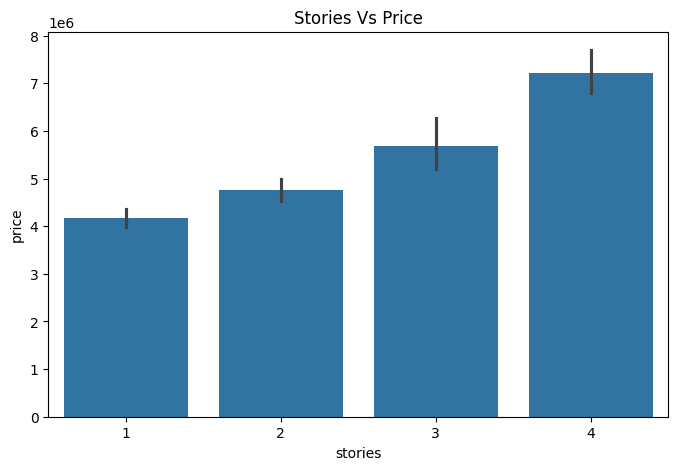

In [39]:
plt.figure(figsize=(8,5))
sns.barplot(x='stories',y='price',data=df)
plt.title('Stories Vs Price')
plt.show()

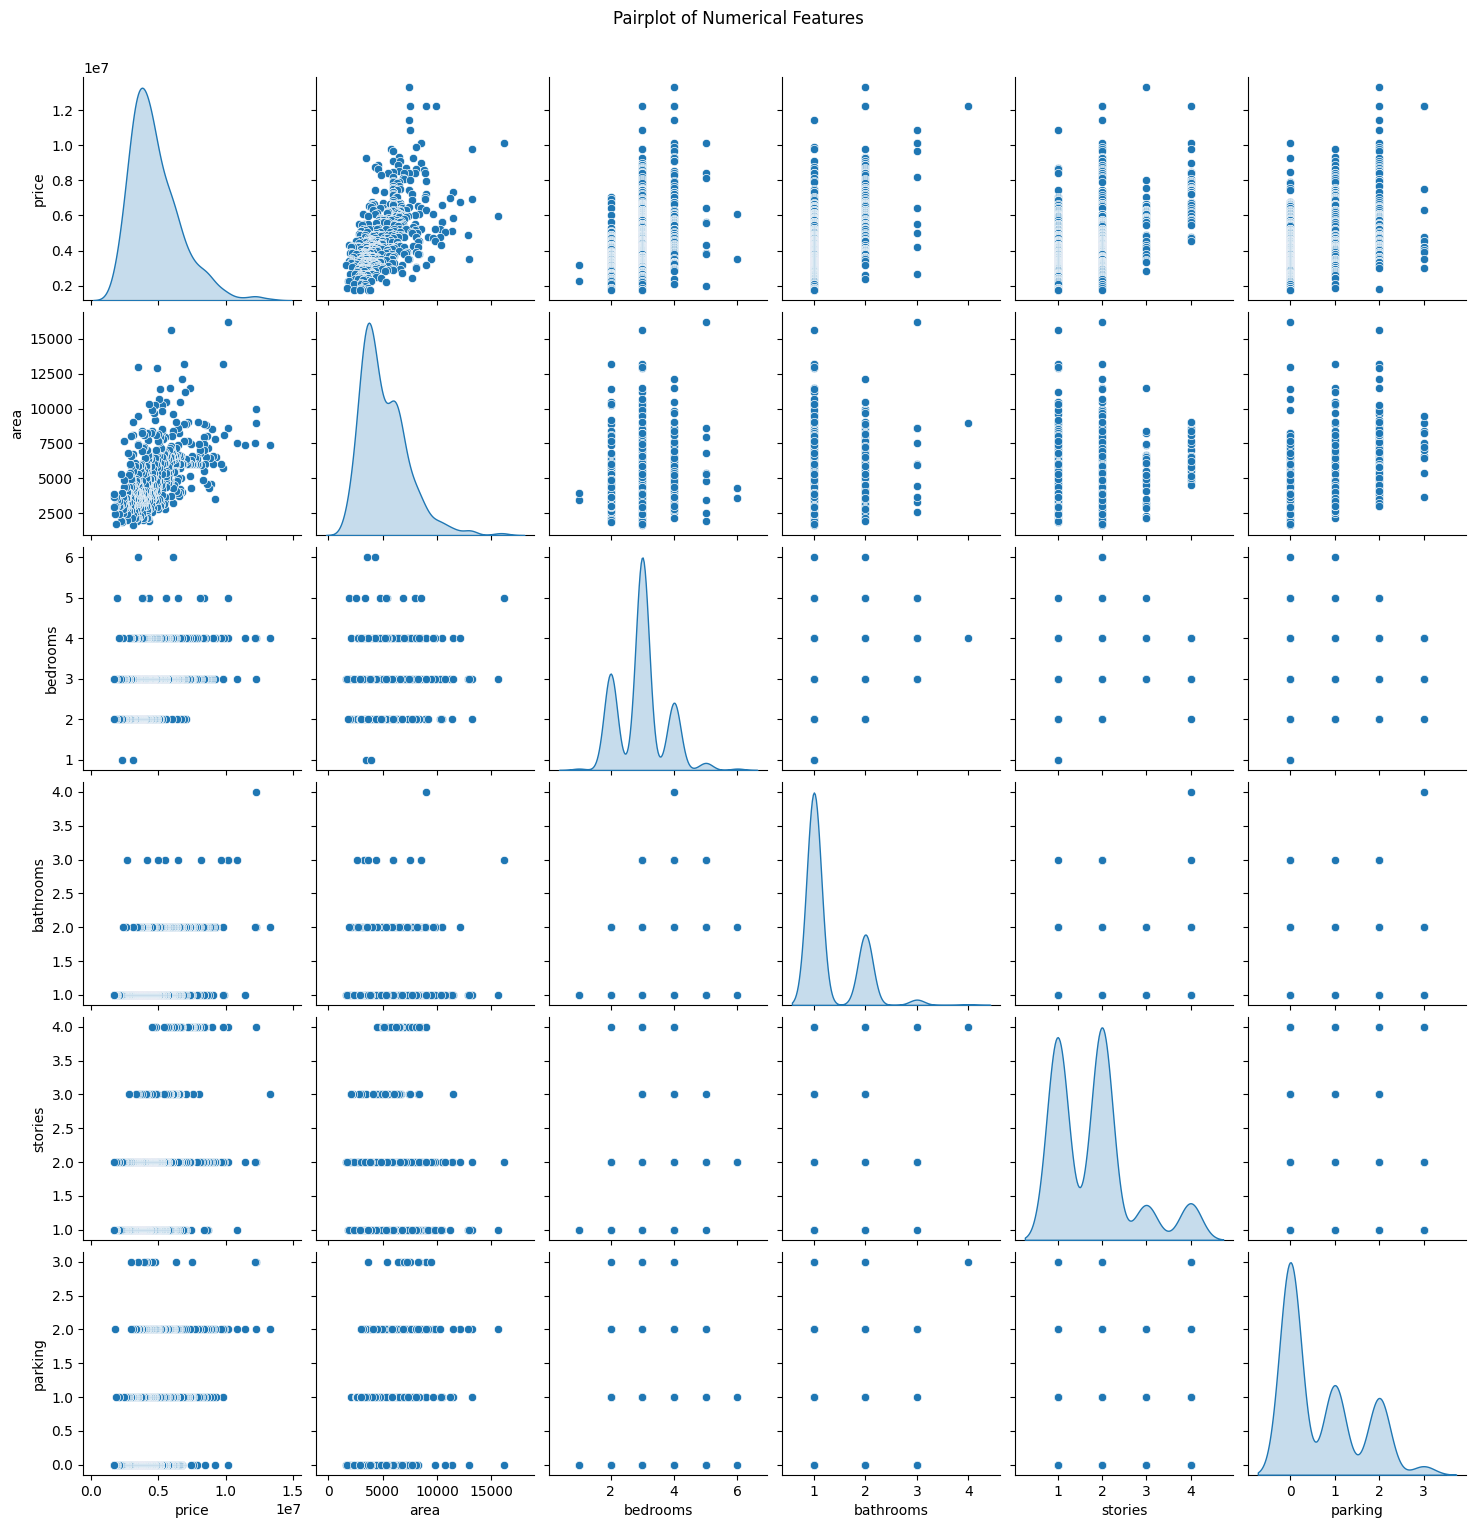

In [41]:
sns.pairplot(df,diag_kind='kde')
plt.suptitle("Pairplot of Numerical Features",y=1.02)
plt.show()

In [42]:
545*0.2

109.0

In [43]:
545-109

436

In [44]:
#fit= jasto xa testai 
#fit_transform=change/convert

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X=df_encode.drop('price', axis=1)
y=df_encode['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model=LinearRegression()
model.fit(X_train, y_train)
print('Model R**2 on training data: ', model.score(X_train, y_train))

Model R**2 on training data:  0.6859438988560158


In [ ]:
#model hyperparameter tuning
ramro garna paxi padxau


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

X=df_encode.drop('price', axis=1)
y=df_encode['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model=RandomForestRegressor()
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [61]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
model.fit(X_train, y_train)

print('Model R**2 on training data: ', model.score(X_train, y_train))

Model R**2 on training data:  0.948591558871039


In [62]:
from sklearn.tree import DecisionTreeRegressor

model=DecisionTreeRegressor()
model.fit(X_train, y_train)

print('Model R**2 on training data: ', model.score(X_train, y_train))

Model R**2 on training data:  0.9985402884288594
